In [629]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [630]:
df_empleados = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/modelos_segundo_parcial/empleados/HR_comma_sep.csv")
df_empleados = df_empleados.copy()

In [631]:
df_empleados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


___

## **Parte 1: Comprensión y Preparación de Datos**

In [632]:
df_empleados.columns

Index(['satisfaction_level ', 'last_evaluation ', 'number_project ',
       'average_montly_hours ', 'time_spend_company ', 'Work_accident ',
       'left ', 'promotion_last_5years ', 'Department  ', 'salary'],
      dtype='object')

In [633]:
from funciones.eda_y_ml import whitespace_remover_and_columns
df_empleados = whitespace_remover_and_columns(df_empleados)

### → Validación de la data

In [634]:
df_empleados.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [635]:
print("El dataset tiene " + str(df_empleados.shape[0])+ " filas.")
print("El dataset tiene " + str(df_empleados.shape[1])+ " columnas.")

El dataset tiene 14999 filas.
El dataset tiene 10 columnas.


In [636]:
from funciones.eda_y_ml import validate_columns 
validate_columns(df_empleados)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
satisfaction_level,NaN,14999.0,0,0.0,"[0.53, 0.38, 0.68, 0.91, 0.18]"
last_evaluation,NaN,14999.0,0,0.0,"[0.66, 0.52, 0.78, 0.99, 0.48]"
number_project,NaN,14999.0,0,0.0,"[3, 2, 5, 3, 4]"
average_montly_hours,NaN,14999.0,0,0.0,"[191, 161, 233, 188, 240]"
time_spend_company,NaN,14999.0,0,0.0,"[3, 3, 3, 3, 4]"
Work_accident,NaN,14999.0,0,0.0,"[0, 0, 0, 1, 0]"
left,NaN,14999.0,0,0.0,"[0, 1, 0, 0, 0]"
promotion_last_5years,NaN,14999.0,0,0.0,"[0, 0, 0, 0, 0]"
Department,10,14999,0,0.0,"[IT, IT, technical, support, sales]"
salary,3,14999,0,0.0,"[high, medium, high, medium, medium]"


In [637]:
df_empleados.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


___

### →  Veo los tipos de datos con dtypes

In [638]:
df_empleados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [639]:
df_empleados.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#### Los tipos de datos parecen estar bien, no hay que hacer cambios.

In [640]:
df_empleados["Work_accident"].value_counts() # Al parecer hay menos empleados que NO cometieron accidentes que los que sí.

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [641]:
df_empleados["left"].value_counts() # Al parecer hay menos empleados que NO se fueron de la empresa que los que sí.

left
0    11428
1     3571
Name: count, dtype: int64

In [642]:
df_empleados.duplicated().sum() # Procedemos a eliminar valores duplicados

3008

In [643]:
df_empleados.drop_duplicates(inplace=True)

In [644]:
df_empleados.shape

(11991, 10)

___

### → Valores outliers

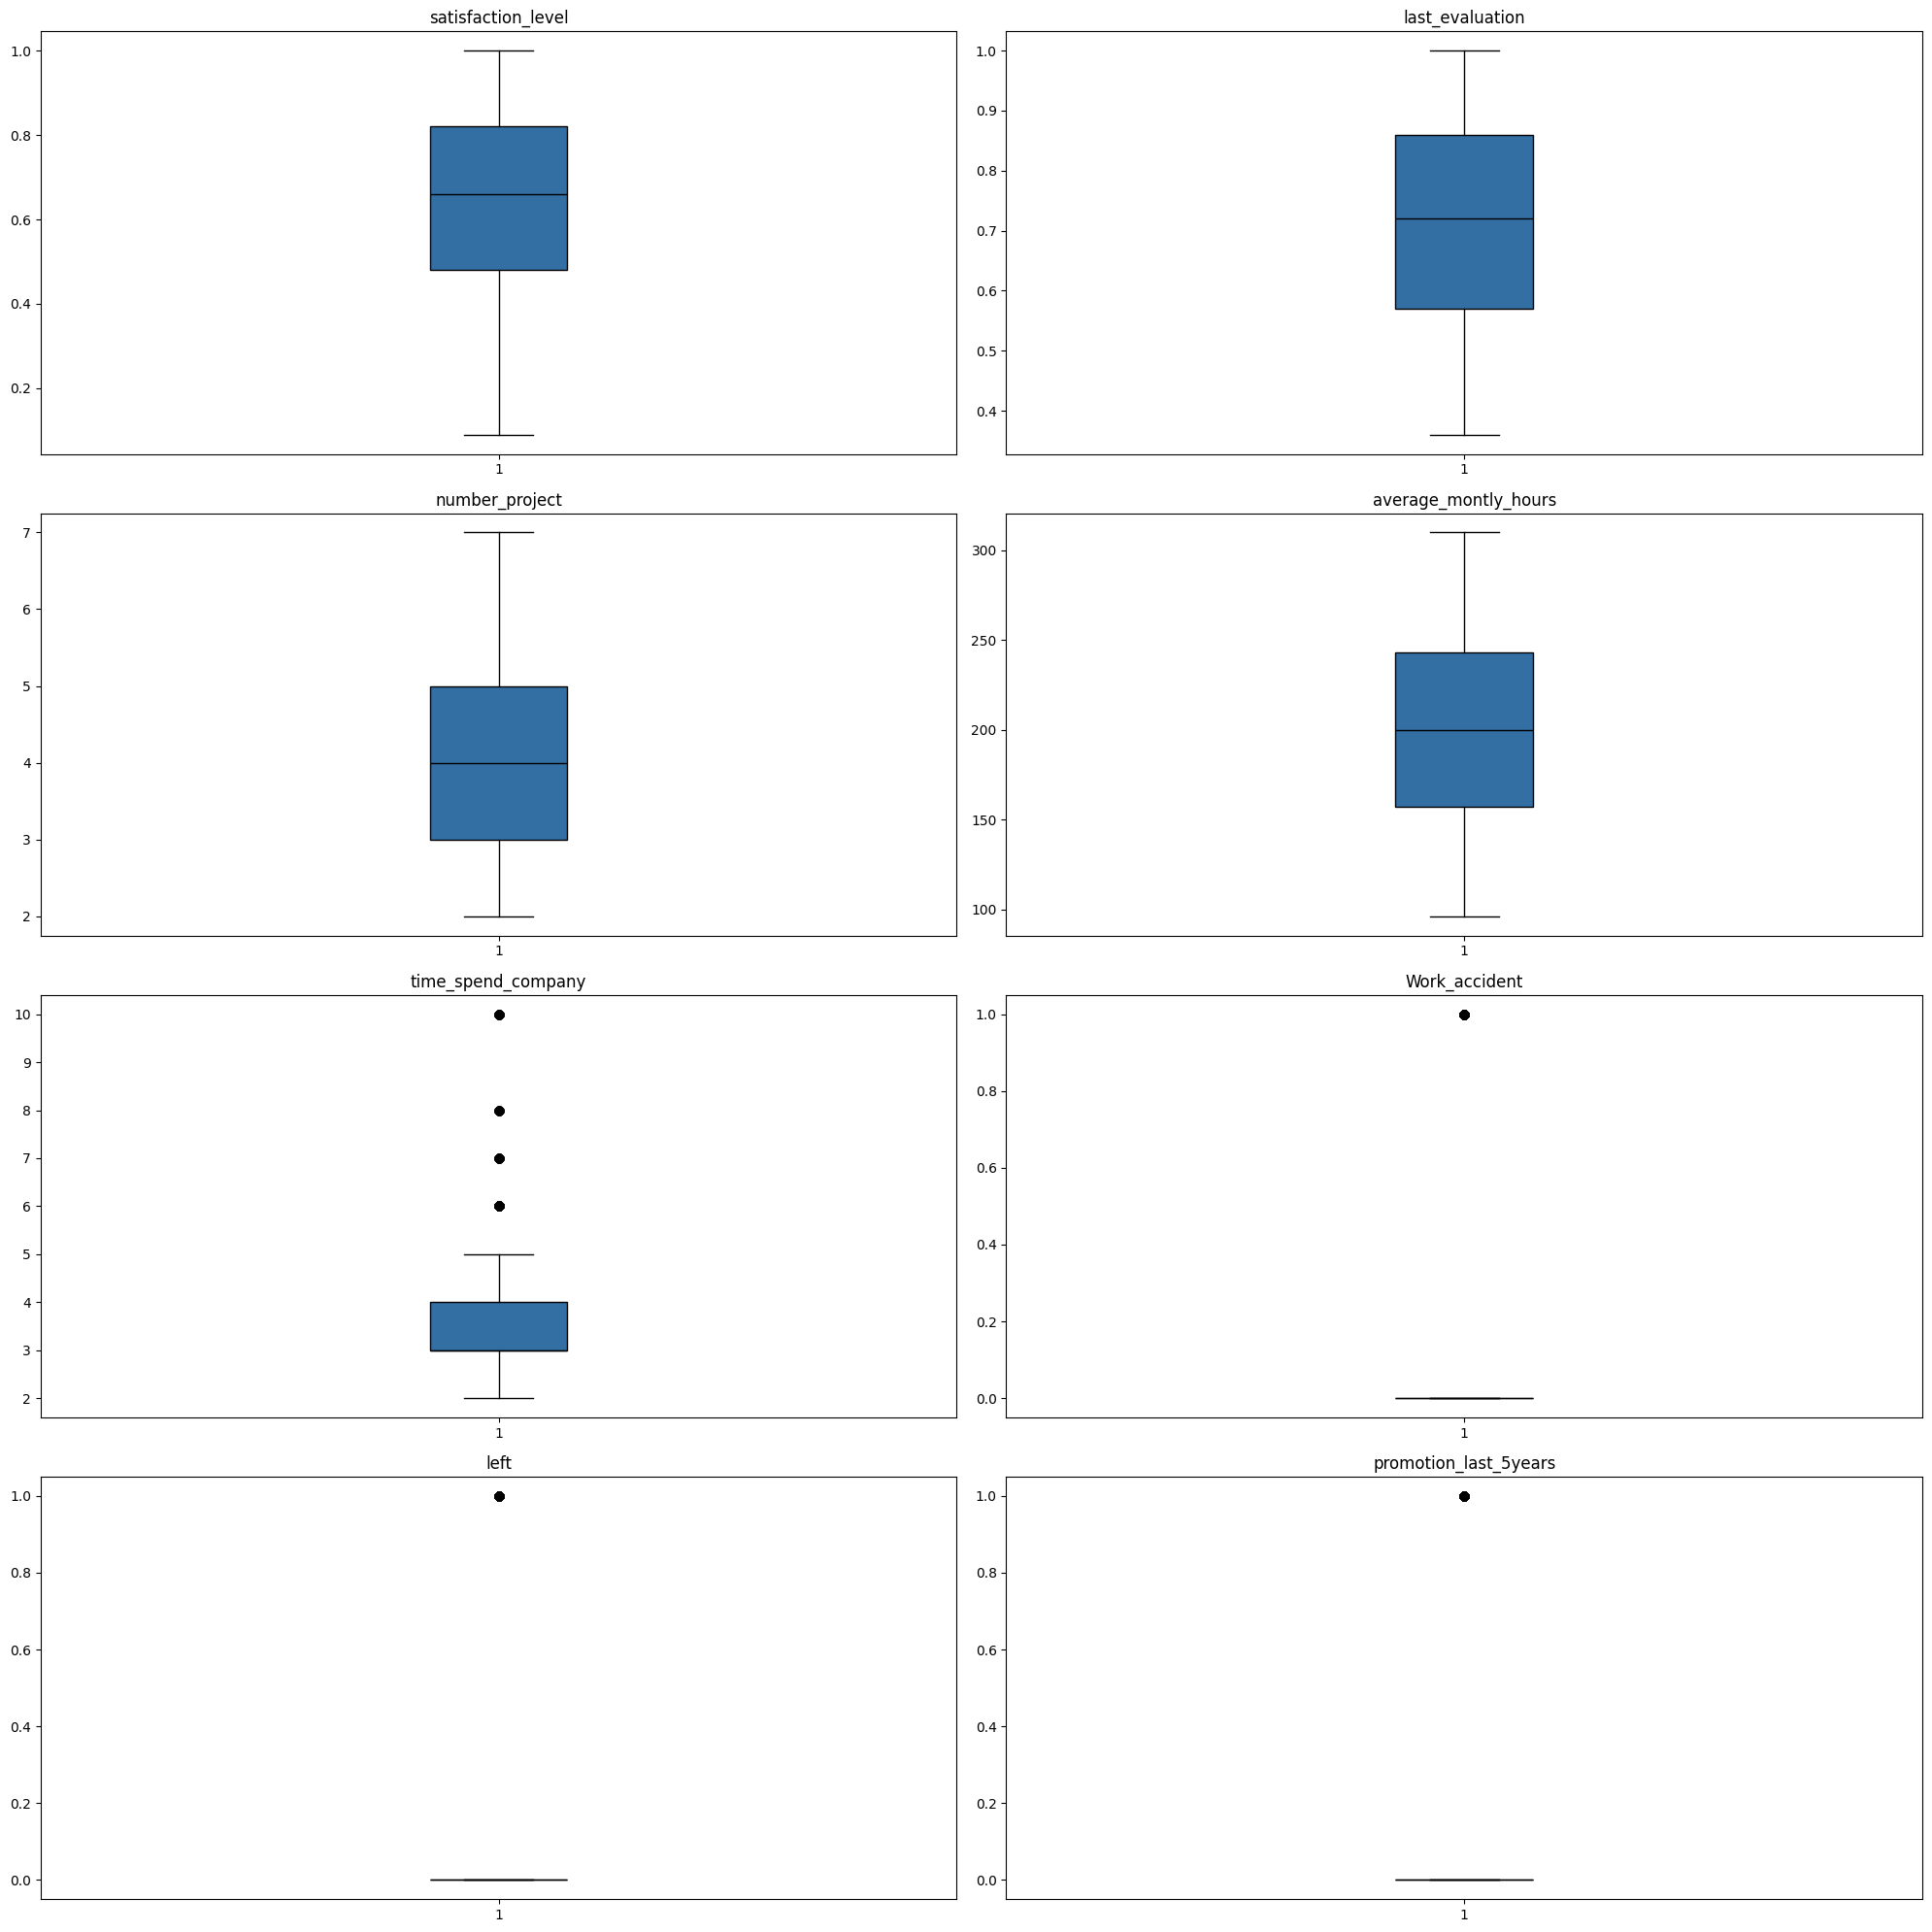

In [645]:
from funciones.eda_y_ml import plot_outliers
plot_outliers(df_empleados)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos. 

___

## **Parte 2: Análisis Exploratorio de Datos**


### → Análisis de sesgos por salarios (satisfacción). Uso un groupby para ver si aquellos salarios que son más altos están sesgados hacia mayor satisfacción por parte de los trabajadores.

In [646]:
df_salarios_con_satisfaccion = df_empleados.groupby('salary').aggregate({'satisfaction_level': 'mean'}).reset_index()
df_salarios_con_satisfaccion.sort_values(by='satisfaction_level', ascending=True, inplace=True)

<Axes: xlabel='salary', ylabel='satisfaction_level'>

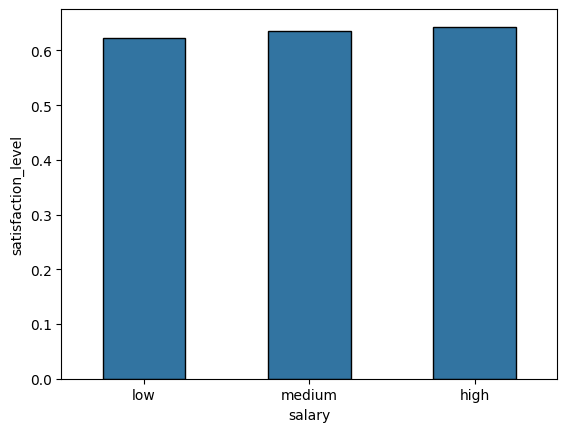

In [647]:
sns.barplot(x = 'salary', y = 'satisfaction_level', data = df_salarios_con_satisfaccion, width=0.5, edgecolor= "black")

In [648]:
"""
barplot = sns.barplot(x = 'salary', y = 'satisfaction_level', data = df_salarios_con_satisfaccion, width=0.5)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()
"""

"\nbarplot = sns.barplot(x = 'salary', y = 'satisfaction_level', data = df_salarios_con_satisfaccion, width=0.5)\n\nfor p in barplot.patches:\n    barplot.annotate(format(p.get_height(), '.2f'), \n                   (p.get_x() + p.get_width() / 2., p.get_height()), \n                   ha = 'center', va = 'center', \n                   xytext = (0, 10), \n                   textcoords = 'offset points')\n\nplt.show()\n"

#### Podemos decir que a mayor salario, hay una mayor satisfaccción por parte de los trabajadores.

___

### → Análisis de sesgos por departamento. Uso un groupby para ver en qué departamento hay una mayor cantidad de empleados que se van.

In [649]:
df_departamento_con_left = df_empleados.groupby('Department').aggregate(ex_empleados=('left', 'sum'), total_empleados=('left', 'count')).reset_index()
df_departamento_con_left["tasa_de_retencion_empleados"] = 1 - (df_departamento_con_left["ex_empleados"] / df_departamento_con_left["total_empleados"])
df_departamento_con_left.sort_values(by='tasa_de_retencion_empleados', ascending=True, inplace=True)
df_departamento_con_left

,Department,ex_empleados,total_empleados,tasa_de_retencion_empleados
3,hr,113,601,0.811980
2,accounting,109,621,0.824477
9,technical,390,2244,0.826203
8,support,312,1821,0.828666
7,sales,550,3239,0.830195
5,marketing,112,673,0.833581
0,IT,158,976,0.838115
6,product_mng,110,686,0.839650
1,RandD,85,694,0.877522
4,management,52,436,0.880734


<Axes: xlabel='Department', ylabel='tasa_de_retencion_empleados'>

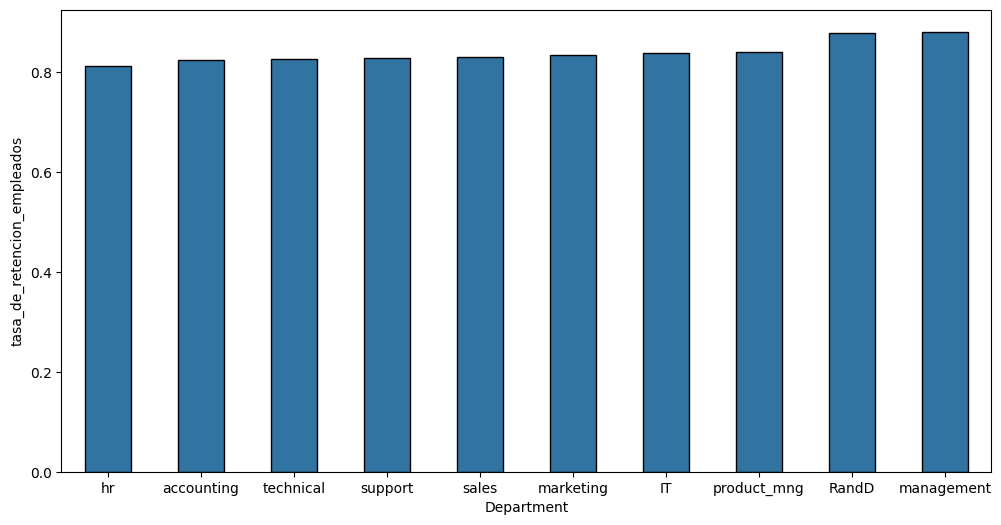

In [650]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Department', y = 'tasa_de_retencion_empleados', data = df_departamento_con_left, width=0.5, edgecolor= "black")

#### Podemos decir que "Research & Development" y "Management" son los departamentos que mayor tasa de retención en cuanto a empleados tienen (alrededor del 85%). Por el otro lado, el area de "Human Resources", es el que peor tasa de retención tiene con casi 80%.

___

### → Análisis de sesgos por salarios (left). Uso un groupby para ver si una razón por la cual las personas que se fueron de las empresas, era el salario.

In [651]:
df_salarios_con_left = df_empleados.groupby('salary').aggregate(ex_empleados=('left', 'sum'), total_empleados=('left', 'count')).reset_index()
df_salarios_con_left["tasa_de_desercion_empleados"] = (df_salarios_con_left["ex_empleados"] / df_salarios_con_left["total_empleados"])
df_salarios_con_left.sort_values(by='tasa_de_desercion_empleados', ascending=True, inplace=True)
df_salarios_con_left

,salary,ex_empleados,total_empleados,tasa_de_desercion_empleados
0,high,48,990,0.048485
2,medium,769,5261,0.146170
1,low,1174,5740,0.204530


<Axes: xlabel='salary', ylabel='tasa_de_desercion_empleados'>

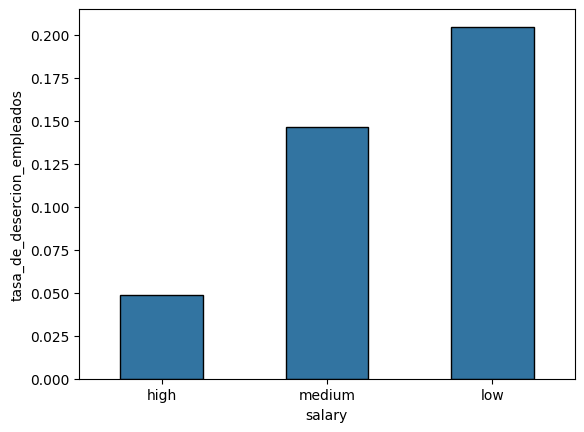

In [652]:
sns.barplot(x = 'salary', y = 'tasa_de_desercion_empleados', data = df_salarios_con_left, width=0.5, edgecolor= "black")

#### Podemos decir que aquellos empleados con un salario bajo son los que tienden a irse más de esta empresa. Aquellos con un salario alto son los que más permanecen.

___

### → Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

### *Regresión Logística*

In [653]:
X = df_empleados[["satisfaction_level", "average_montly_hours", "promotion_last_5years"]]
y = df_empleados["left"]

In [654]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test. Esto lo hago para que el modelo no haga overfitting.

In [655]:
X_train.dtypes

satisfaction_level       float64
average_montly_hours       int64
promotion_last_5years      int64
dtype: object

In [656]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit(method='bfgs')
stats1=result.summary()
print(stats1)

         Current function value: 0.388303
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                          MNLogit Regression Results                          
Dep. Variable:                   left   No. Observations:                 9592
Model:                        MNLogit   Df Residuals:                     9588
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.1354
Time:                        18:08:05   Log-Likelihood:                -3724.6
converged:                      False   LL-Null:                       -4307.8
Covariance Type:            nonrobust   LLR p-value:                1.417e-252
               left=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0377      0.140     -0.269

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


___

## **Modelado**
### → Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados. Evaluación del Modelo. Genera una matriz de confusión para evaluar el rendimiento del modelo. Calcula la precisión, el recall y la exactitud del modelo.

### *Árbol de Decisión*

In [657]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)



/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

### *Matriz de Confusión*

In [658]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


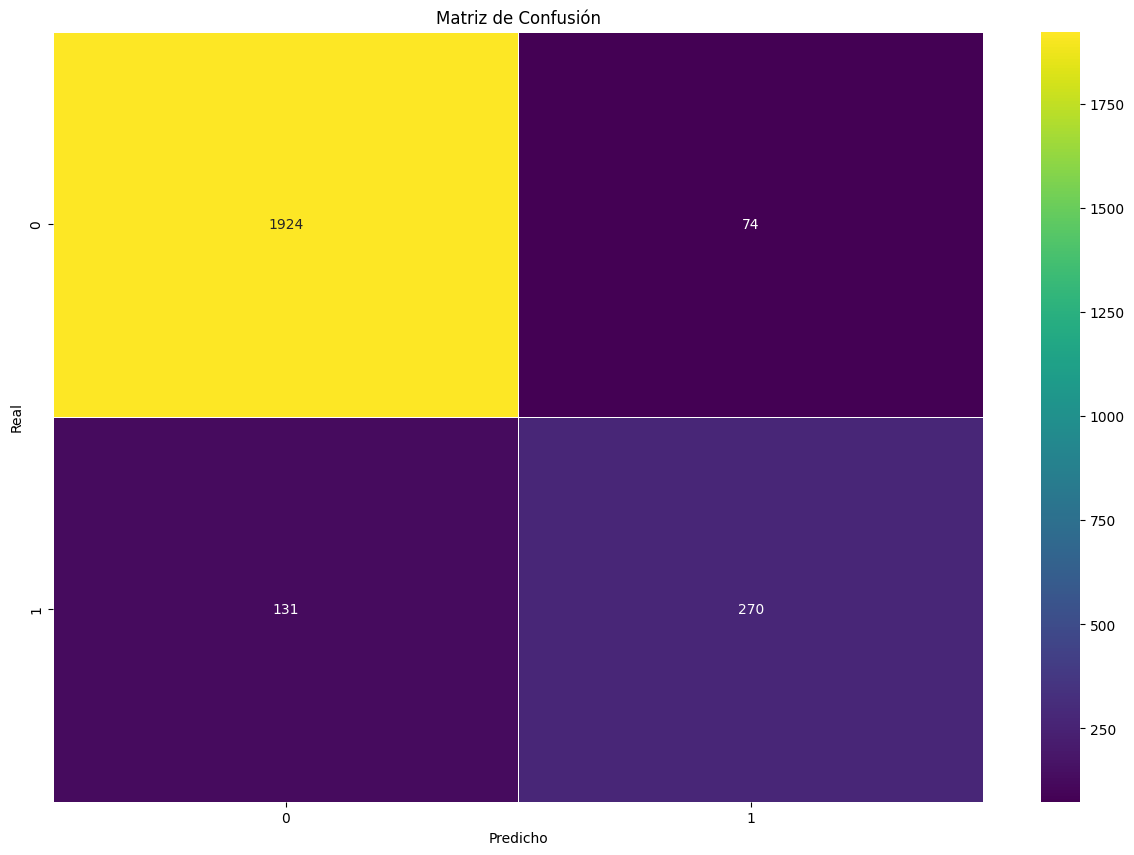

In [659]:
y_pred = clf.predict(X_test)
y_true = y_test
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

### *Precisión*

In [660]:
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Handling the case where tp + fp is 0
print(precision)

0.9362530413625304


### *Recall*

In [661]:
recall = tp / (tp + fn) if (tp + fn) > 0 else 0     # Handling the case where tp + fn is 0
print(recall)

0.9629629629629629


### *Accuracy / Exactitud*

In [662]:
# Metrics calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(accuracy)

0.9145477282200917


### *Tree Image*

In [663]:
from sklearn.tree import export_graphviz
import graphviz

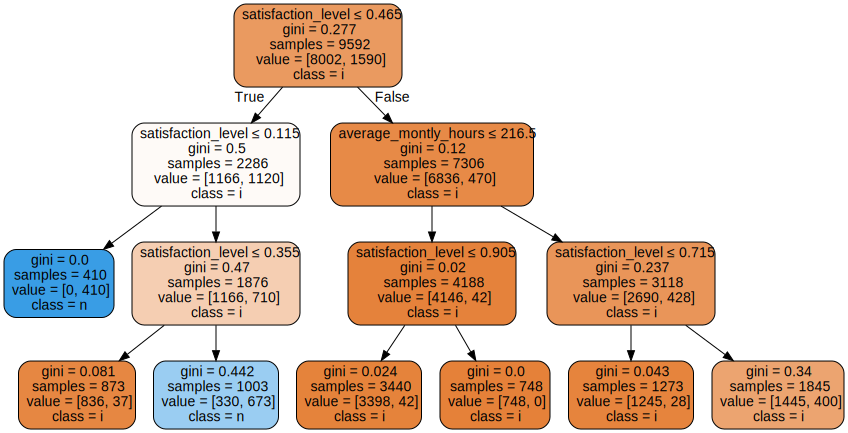

In [664]:
features = X.columns
targets = "incumplimiento" # siempre dejo la variable encodeada en target
data = export_graphviz(clf, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph